**Identifica√ß√£o**: Luiz Sigolis (1983794) ; Vanessa de Oliveira Gil (2077382) ; Nelson Conceicao (2714567)

# Projeto II - Futuro dos Dados e Aplica√ß√£o de Big Data

## Avalia√ß√£o I - Introdu√ß√£o e Fundamenta√ß√£o Te√≥rica

### **An√°lise dos resultados de sentimento das Avalia√ß√µes da Amazon Alexa**

###  Defini√ß√£o do Tema: Avalia√ß√µes da Amazon Alexa

As empresas centradas nos clientes consideram priorit√°ria a mensura√ß√£o da qualidade dos servi√ßos e a satisfa√ß√£o dos seus usu√°rios. Comparar o desempenho da empresa com a expectativa √© a base do conceito de satisfa√ß√£o dos clientes. Esse indicador est√° relacionado ao maior retorno sobre o investimento (ROI), fideliza√ß√£o, volume de compras e valoriza√ß√£o da marca. Um sistema de avalia√ß√£o da satisfa√ß√£o √© a base para decis√µes quanto √† gest√£o da qualidade dos servi√ßos. Entretanto, a obten√ß√£o desses dados √© feita por levantamentos envolvendo diversos fatores do ciclo de servi√ßo, que geralmente tem muitas etapas, sendo que algumas delas n√£o s√£o percebidas ou valorizadas pelos clientes.

Os fatores que mais contribuem para a satisfa√ß√£o devem ser valorizados e comunicados para sua clientela, o que pode gerar um c√≠rculo virtuoso de mais satisfa√ß√£o, mais vendas e mais lucros. A moldagem dos fatores que geram satisfa√ß√£o ou que evitam a insatisfa√ß√£o faz com que as empresas modifiquem as opera√ß√µes e a√ß√µes de marketing.

Inspira√ß√£o:
Seus dados estar√£o em frente √† maior comunidade de ci√™ncia de dados do mundo. Que perguntas voc√™ deseja ver respondidas?

> **Objetivo**

Esse projeto tem como objetivo aplicar algoritmos de machine learning para prever e avaliar as avalia√ß√µes/reviews positivas/negativas dos produtos do ecossistema Alexa.

> **Especifica√ß√£o T√©cnica**

Dataset: Para desenvolvimento desse projeto, ser√° utilizado o dataset denominado "amazon_alexa.tsv", dispon√≠vel em: <https://www.kaggle.com/sid321axn/amazon-alexa-reviews >.

Este conjunto de dados consiste em aproximadamente 3.000 avalia√ß√µes de clientes da Amazon que s√£o os reviews, as avalia√ß√µes com estrelas (1-5), data da avalia√ß√£o, modelo do produto e feedbacks. Dentre os produtos, est√£o registrados a Alexa Echo, Echo dots, Alexa Firesticks, dentre outros.

Formato: 

*   **Rating** = Notas de Avalia√ß√£o de 1 at√© 5 (int).
*   **Date** = Data da realiza√ß√£o da Avalia√ß√£o. 
*   **Variation** = Diferentes modelos de Alexa.
*   **Verified_reviews** = Devolutiva comentada das avalia√ß√µes.
*   **feedback** = Retorno das avalia√ß√µes de 0 a 1 (int).


M√©todos de Pr√©-processamento: 
* Limpeza dos dados (Duplicados/Nulos)
* Remo√ß√£o de Stopwords e pontua√ß√µes
* T√©cnicas de Oversampling

Tarefa de Aprendizado: Ser√° aplicado a tarefa de NLP e An√°lise de Sentimentos.

Algoritmos Avaliados: SVC, RidgeClassifier, Perceptron, PassiveAggressiveClassifier, SGDClassifier, Bernoulli e RandomForestClassifier

## Avalia√ß√£o 2 - Metodologia, Resultados e Discuss√£o (Segunda parte): Prepara√ß√£o dos Dados

### Importando Bibliotecas utilizadas neste projeto

In [1]:
# Importar Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from google.colab import data_table

### Importando o Dataset

In [2]:
# Importando o Dataset do GitHub
url = "https://raw.githubusercontent.com/luizsigolis/AlexaReviews-MLProject/main/amazon_alexa.tsv"
dataset = pd.read_csv(url, sep='\t', header=0)

### Exibi√ß√£o de trechos dos dados

In [3]:
"""
Dimens√£o dos dados:
  - Linhas: 3150
  - Colunas (Vari√°veis): 5 (rating,	date,	variation,	verified_reviews,	feedback)
"""
dataset.shape

(3150, 5)

In [4]:
# Exibi√ß√£o de trecho dos dados p√≥s-importa√ß√£o e pr√©-limpeza (5 Colunas e 3150 Linhas)
data_table.DataTable(dataset, include_index=True, num_rows_per_page=10)

In [5]:
# Exibi√ß√£o de informa√ß√µes adicionais sobre os dados do dataset, onde √© poss√≠vel observar que n√£o h√° nulos no dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
# Exibi√ß√£o da estat√≠stica descritiva do dataset
dataset.describe()

rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000

*    Na exibi√ß√£o da estat√≠stica descritiva do dataset, podemos observar que temos 3150 revis√µes, onde a m√©dia das notas das revis√µes √© igual a 4.46, o valor m√≠nimo √© 1, o valor m√°ximo √© 5 e o desvio padr√£o √© de aproximadamente 1.06.

### **Pr√©-Processamento dos Dados**

* Verificar se haviam dados duplicados e/ou nulos
* Remo√ß√£o de dados duplicados
* Limpeza do Texto



In [7]:
# Verificar dados duplicados
dataset.duplicated().sum()

print('H√° {} linhas duplicadas'.format(dataset.duplicated().sum()))

H√° 715 linhas duplicadas


In [8]:
# Verificar dados nulos
dataset.isnull().sum()

print('Qtde de dados nulos:\n\n{}'.format(dataset.isnull().sum()))

Qtde de dados nulos:

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [9]:
# Remo√ß√£o de dados duplicados
dataset.drop_duplicates(inplace=True)

### Informa√ß√£o de novo dataset p√≥s-remo√ß√£o dos duplicados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2800
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            2435 non-null   int64 
 1   date              2435 non-null   object
 2   variation         2435 non-null   object
 3   verified_reviews  2435 non-null   object
 4   feedback          2435 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 114.1+ KB


In [10]:
# Verificar se h√° valores na coluna "Feedback" diferentes de 0 ou 1
dataset['feedback'].unique()

print("Valores existentes na coluna Feedback =\n{}\n".format(dataset['feedback'].unique()))
print("Temos o total de {} reviews\n".format(dataset.shape[0]))

print("Feedback = 1 √© uma review positiva. \nFeedback = 0 √© uma review negativa\n")

# Verificar se h√° valores na coluna "Rating" diferentes de 1 a 5
dataset['rating'].unique()

print("Valores existentes na coluna Rating =\n{}\n".format(dataset['rating'].unique()))

print("Rating variando de 1 a 5 sendo: \n1 a pior nota\n5 a melhor nota")

Valores existentes na coluna Feedback =
[1 0]

Temos o total de 2435 reviews

Feedback = 1 √© uma review positiva. 
Feedback = 0 √© uma review negativa

Valores existentes na coluna Rating =
[5 4 3 2 1]

Rating variando de 1 a 5 sendo: 
1 a pior nota
5 a melhor nota


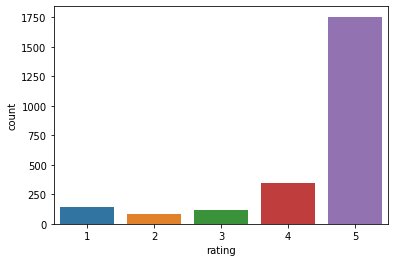

In [11]:
# Plotando um gr√°fico da vari√°vel "Rating" para obter uma vis√£o geral e poss√≠veis outliers (valores discrepantes)
sns.countplot(x='rating', data=dataset)

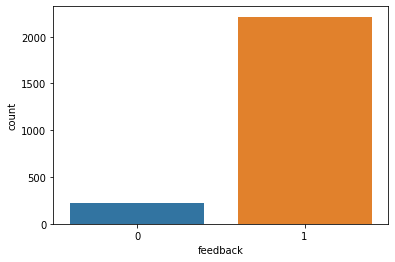

In [12]:
# Plotando um gr√°fico da vari√°vel "Feedback" para obter uma vis√£o geral e poss√≠veis outliers (valores discrepantes)
sns.countplot(x="feedback", data=dataset)

In [13]:
# Consultando novamente a estat√≠stica descritiva dos dados para ter certeza de que a distribui√ß√£o n√£o foi alterada ap√≥s a etapa de pr√©-processamento dos dados
dataset.describe()

rating     feedback
count  2435.000000  2435.000000
mean      4.435318     0.909240
std       1.109562     0.287326
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000

*    Novamente, na exibi√ß√£o da estat√≠stica descritiva do dataset p√≥s-processamento dos dados, podemos observar que temos 2435 revis√µes, onde a m√©dia das notas das revis√µes √© igual a 4.43, o valor m√≠nimo √© 1, o valor m√°ximo √© 5 e o desvio padr√£o √© de aproximadamente 1.1.

#### Avaliando a quantidade de reviews de acordo com cada avalia√ß√£o (rating)


In [14]:
# Agrupar resultados de acordo com os valores da coluna "Rating"
dataset.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         141.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          80.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         113.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         345.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        1756.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

* Nota 1: 141 avalia√ß√µes;
* Nota 2: 80 avalia√ß√µes;
* Nota 3: 113 avalia√ß√µes;
* Nota 4: 345 avalia√ß√µes;
* Nota 5: 1756 avalia√ß√µes;

#### Entendendo a coluna de reviews

In [15]:
# Aplicando f√≥rmula para criar coluna "length", onde ser√° contado a qtde de caracteres de cada entrada da coluna "verified_reviews"
dataset['length'] = dataset['verified_reviews'].apply(len)

# Verificando estrutura do dataset
dataset.head()

rating       date  ... feedback length
0       5  31-Jul-18  ...        1     13
1       5  31-Jul-18  ...        1      9
2       4  31-Jul-18  ...        1    195
3       5  31-Jul-18  ...        1    172
4       5  31-Jul-18  ...        1      5

[5 rows x 6 columns]

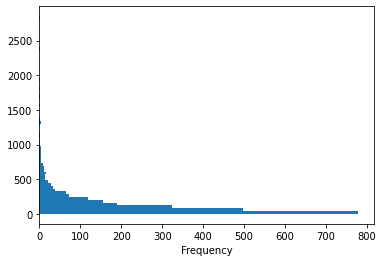

In [16]:
# Plotando gr√°fico para observar a frequ√™ncia de reviews de acordo com a quantidade de caracteres
dataset['length'].plot(bins=70, kind='hist', orientation='horizontal')



*   √â poss√≠vel concluir que grande parte dos reviews est√° com uma m√©dia de caracteres de 0 a 500.



In [17]:
# Breve descri√ß√£o das m√©tricas referente a coluna "Length"
dataset.length.describe()

count    2435.000000
mean      137.899384
std       192.397673
min         1.000000
25%        31.000000
50%        77.000000
75%       170.500000
max      2851.000000
Name: length, dtype: float64

* A review mais longa tem 2851 caracteres e a mais curta tem apenas um caracter. 
Em m√©dia, as revis√µes tem aproximadamente 137 caracteres.

In [18]:
# Maior review
dataset[dataset['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [19]:
# Menor review
dataset[dataset['length'] == 1]['verified_reviews'].iloc[0]

'üòç'

#### Limpando o texto

A limpeza do texto ser√° realizada utilizando a biblioteca nltk para remover stopwords e fazer steamming.

In [20]:
# Realizando download do package de stopwords presente na biblioteca nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# Removendo pontua√ß√µes e stopwords
corpus=[]

for i in range(0,len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['verified_reviews'].iloc[i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [22]:
# Utilizando Bag of words 
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,4].values

#### **Oversampling**

In [23]:
# Verificando se ser√° necess√°rio utilizar t√©cnica de Oversampling
print(sorted(Counter(y).items()))

[(0, 221), (1, 2214)]


In [24]:
# Aplicando t√©cnica de Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled,y_resampled = ros.fit_resample(X, y)

In [25]:
print(sorted(Counter(y_resampled).items()))

[(0, 2214), (1, 2214)]


### **Particionar os dados em Treino/Teste**

In [26]:
# Particionando os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.20, random_state = 0, stratify=y_resampled)
print('Existem {} amostras de treino e {} amostras de teste'.
format(X_train.shape[0], X_test.shape[0]))

Existem 3542 amostras de treino e 886 amostras de teste


## Avalia√ß√£o 3 - Avalia√ß√£o do Projeto de Ensino (Paper): Avalia√ß√£o dos m√©todos e predi√ß√£o

### **Resultados e Predi√ß√£o**

Nesta etapa, estaremos utilizando, testando e avaliando os resultados dos seguintes classificadores:

*   SVC
*   RidgeClassifier
*   Perceptron
*   PassiveAggressiveClassifier
*   KNeighborsClassifier
*   SGDClassifier
*   Bernoulli
*   RandomForestClassifier


In [27]:
# Fun√ß√£o "classifiers" com v√°rios classificadores para uso

def classifiers(clf):

    """
    Classificadores:'SVC', 'RidgeClassifier', 'Perceptron', 
                    'PassiveAggressiveClassifier', 'KNeighborsClassifier',
                     'SGDClassifier', 'Bernoulli', 'RandomForestClassifier'
    """

    rng = np.random.RandomState(0)

    if clf == 'SVC':
        # SVM Classifier
        from sklearn.svm import SVC
        classifier = SVC(kernel='linear')
        classifier.fit(X_train, y_train)
        
    elif clf == 'RidgeClassifier':
        #Ridge Classifier
        from sklearn.linear_model import RidgeClassifier
        classifier = RidgeClassifier(random_state=rng)
        classifier.fit(X_train, y_train)
    
    elif clf == 'Perceptron':
        # Perceptron
        from sklearn.linear_model import Perceptron
        classifier = Perceptron( max_iter= 2000, alpha= 0.01, random_state=rng)
        classifier.fit(X_train, y_train)

    elif clf == 'PassiveAggressiveClassifier':
        # Passive Agressive Classifier
        from sklearn.linear_model import PassiveAggressiveClassifier
        classifier = PassiveAggressiveClassifier(max_iter=1000, 
        random_state=rng,tol=1e-3)
        classifier.fit(X_train, y_train)

    elif clf == 'KNeighborsClassifier':
        # KNN
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors=8)
        classifier.fit(X_train, y_train)

    elif clf == 'SGDClassifier':
        # SGD Classifier
        from sklearn.linear_model import SGDClassifier
        classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=rng)
        classifier.fit(X_train, y_train)

    elif clf == 'Bernoulli':
        # Bernoulli Classifier
        from sklearn.naive_bayes import BernoulliNB
        classifier = BernoulliNB()
        classifier.fit(X_train, y_train)
    
    elif clf == 'RandomForestClassifier':
        # RandomForestClassifier
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(random_state=rng)
        classifier.fit(X_train, y_train)

    return classifier

In [28]:
# Utilizando fun√ß√£o "predict" para mensurar m√©tricas
def predict(classifier):
    y_pred = classifier.predict(X_test)
    metric = metrics.classification_report(y_test, y_pred, target_names=["Positivo", "Negativo"])
    print(metric)
    return y_pred, metric

In [29]:
# Utilizando fun√ß√£o "confusion_matrix_classifier" para realizar a cria√ß√£o de matriz de confus√£o
def confusion_matrix_classifier(y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='.2f', xticklabels=["Positivo", "Negativo"], yticklabels=["Positivo", "Negativo"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return acc

In [30]:
# Criando array para inserir os modelos para posterior avalia√ß√£o
models = [ 'SVC', 'RidgeClassifier', 'Perceptron', 'PassiveAggressiveClassifier',
            'KNeighborsClassifier', 'SGDClassifier', 'Bernoulli', 'RandomForestClassifier',]

SVC
              precision    recall  f1-score   support

    Positivo       0.91      0.98      0.95       443
    Negativo       0.98      0.91      0.94       443

    accuracy                           0.94       886
   macro avg       0.95      0.94      0.94       886
weighted avg       0.95      0.94      0.94       886



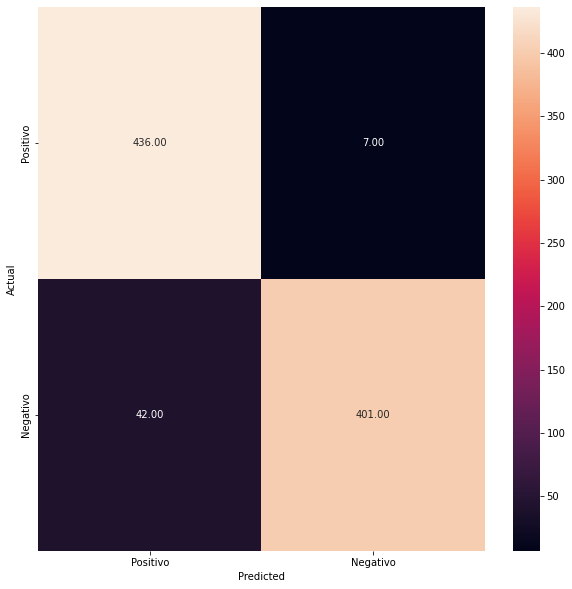

RidgeClassifier
              precision    recall  f1-score   support

    Positivo       0.91      0.92      0.91       443
    Negativo       0.92      0.91      0.91       443

    accuracy                           0.91       886
   macro avg       0.91      0.91      0.91       886
weighted avg       0.91      0.91      0.91       886



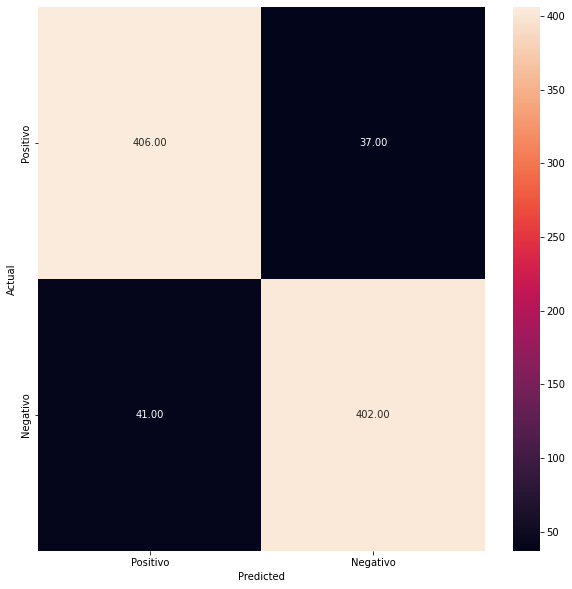

Perceptron
              precision    recall  f1-score   support

    Positivo       0.92      0.98      0.95       443
    Negativo       0.98      0.92      0.95       443

    accuracy                           0.95       886
   macro avg       0.95      0.95      0.95       886
weighted avg       0.95      0.95      0.95       886



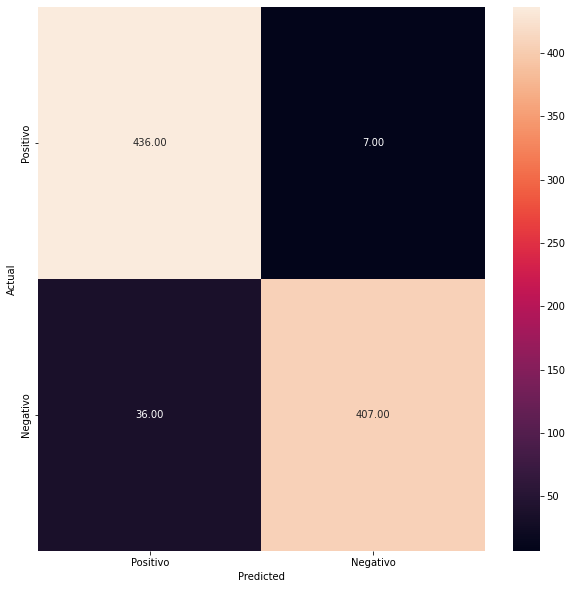

PassiveAggressiveClassifier
              precision    recall  f1-score   support

    Positivo       0.94      0.92      0.93       443
    Negativo       0.92      0.94      0.93       443

    accuracy                           0.93       886
   macro avg       0.93      0.93      0.93       886
weighted avg       0.93      0.93      0.93       886



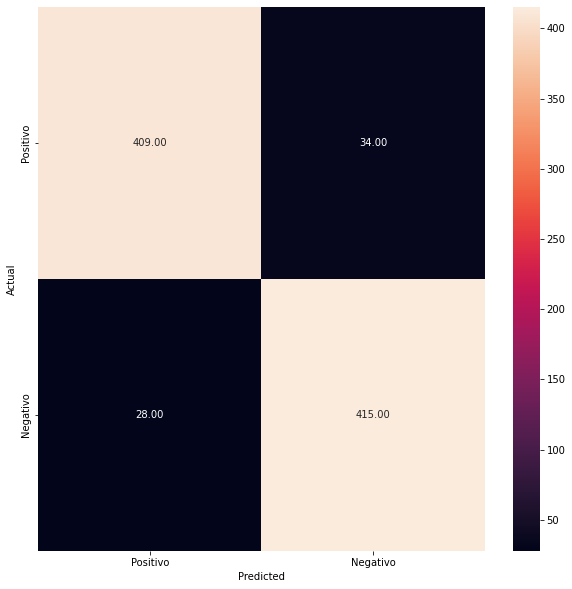

KNeighborsClassifier
              precision    recall  f1-score   support

    Positivo       0.80      1.00      0.89       443
    Negativo       1.00      0.75      0.86       443

    accuracy                           0.88       886
   macro avg       0.90      0.88      0.87       886
weighted avg       0.90      0.88      0.87       886



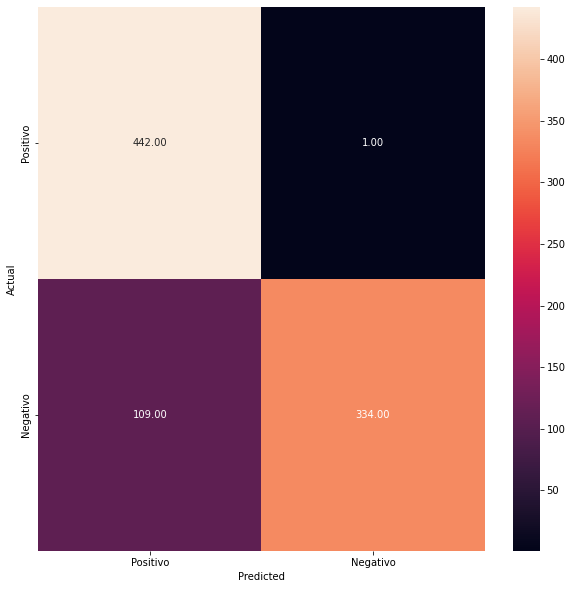

SGDClassifier
              precision    recall  f1-score   support

    Positivo       0.90      0.98      0.94       443
    Negativo       0.98      0.89      0.93       443

    accuracy                           0.94       886
   macro avg       0.94      0.94      0.94       886
weighted avg       0.94      0.94      0.94       886



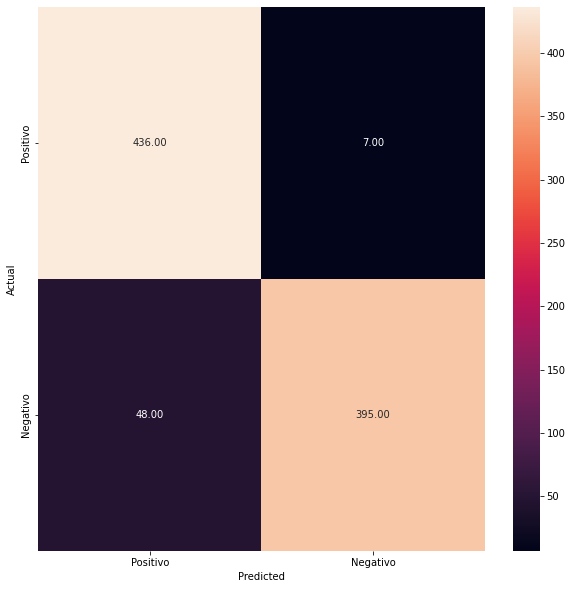

Bernoulli
              precision    recall  f1-score   support

    Positivo       0.94      0.72      0.81       443
    Negativo       0.77      0.95      0.85       443

    accuracy                           0.83       886
   macro avg       0.85      0.83      0.83       886
weighted avg       0.85      0.83      0.83       886



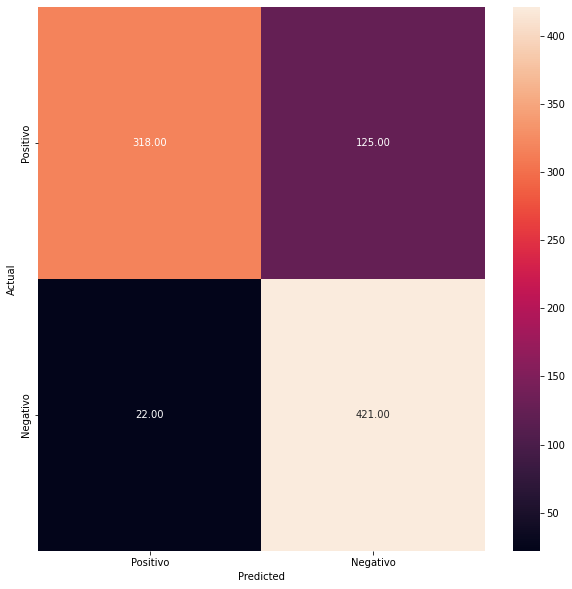

RandomForestClassifier
              precision    recall  f1-score   support

    Positivo       0.94      1.00      0.97       443
    Negativo       1.00      0.94      0.97       443

    accuracy                           0.97       886
   macro avg       0.97      0.97      0.97       886
weighted avg       0.97      0.97      0.97       886



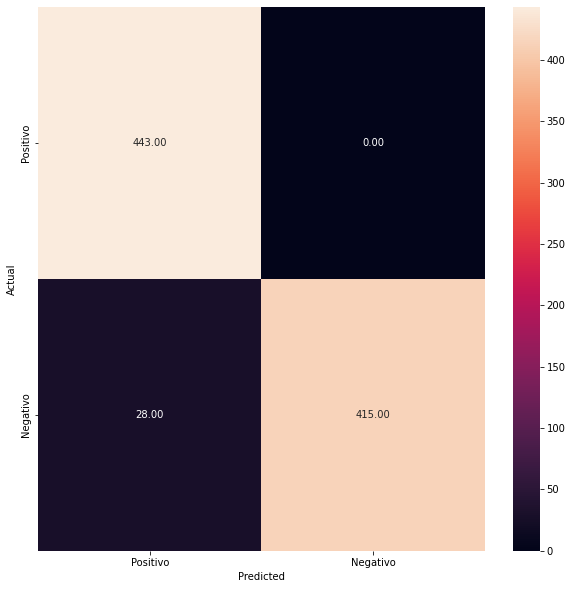

Resultado dos classificadores: 
[['SVC', 0.9446952595936795], ['RidgeClassifier', 0.9119638826185101], ['Perceptron', 0.9514672686230248], ['PassiveAggressiveClassifier', 0.9300225733634312], ['KNeighborsClassifier', 0.8758465011286681], ['SGDClassifier', 0.9379232505643341], ['Bernoulli', 0.8340857787810384], ['RandomForestClassifier', 0.9683972911963883]]
Maior Acur√°cia
0.9683972911963883
Melhor classificador e Acur√°cia
['RandomForestClassifier', 0.9683972911963883]


In [31]:
# Avaliando os classificadores
result = []
for model in models:
    print("=" * 80)
    print(model)
    r = classifiers(model)
    y_pred, metric = predict(r)
    acc = confusion_matrix_classifier(y_pred)
    result.append([model, acc])

scores = []
for i in range (len(result)):
    scores.append(result[i][1])
index = np.where(scores == np.amax(scores))[0][0]

print("=" * 80)
print("Resultado dos classificadores: ")

print(result)

print("=" * 80)
print("Maior Acur√°cia")
print(max(scores))

print("=" * 80)
print("Melhor classificador e Acur√°cia")
print(result[index])

## Conclus√£o



Dentre os classificadores avaliados, podemos observar que o que mais se destacou, tanto pela alta porcentagem de acerto quanto pelo baixo valor de falsos-positivos/negativos foi o classificador **RandomForestClassifier**

### **Classificadores:**

* **SVC**: Acur√°cia de 0.94 por√©m com alto n√∫mero de falso-positivos (42) e n√∫mero de falso-negativos (7) dentro do desvio padr√£o.
* **RidgeClassifier**: Acur√°cia de 0.91 com um alto n√∫mero de falso-positivos (41) e falso-negativos (37).
* **Perceptron**: Acur√°cia de 0.95 com alto n√∫mero de falso-positivos (36) e n√∫mero de falso-negativos (7) dentro do desvio padr√£o.
PassiveAggressiveClassifier: Acur√°cia de 0.93 com alto n√∫mero de falso-positivos (28) e falso-negativos (34).
* **KneighborsClassifier**: Acur√°cia de 0.88 com um n√∫mero extremamente alto de falso-positivos (109) e com apenas um √∫nico falso-negativo (1).
* **SGDClassifier**: Acur√°cia de 0.94 com um alto n√∫mero de falso-positivos (48) e n√∫mero de falso-negativos (7) dentro do desvio padr√£o. Resultado similar ao do classificador SVC com uma leve varia√ß√£o na precis√£o e recall.
* **Bernoulli**: Acur√°cia de 0.83 com um alto n√∫mero de falso-positivos (22) e um n√∫mero extremamente alto de falso-negativos (125). Nesta an√°lise, pode ser considerado o pior classificador.
* **RandomForestClassifier**: Acur√°cia de incr√≠veis 0.97 com um alto n√∫mero de falso-positivos (28) apenas. Nesta an√°lise, pode ser considerado o melhor classificador.

## Refer√™ncias:

* Documenta√ß√£o do Pandas - https://pandas.pydata.org/docs/reference/frame.html

* Documenta√ß√£o API Matplotlib - https://matplotlib.org/stable/api/index

* Documenta√ß√£o API Seaborn - https://seaborn.pydata.org/api.html

* Refer√™ncias de c√≥digo - https://www.kaggle.com/sid321axn/amazon-alexa-reviews/code

* Fun√ß√£o "Train_test_split" - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

* StackOverFlow - https://pt.stackoverflow.com/

* Utilizado refer√™ncias e trechos de c√≥digo diretos do livro did√°tico "Processamento de Linguagem Natural"